In [2]:
import pandas as pd
import numpy as np
import os
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import math

In [35]:
# Load the CSV files into a list of DataFrames
data_dir = "data/keog/"

os.environ['OMP_NUM_THREADS'] = '1'

PRINT = False
SAVE = False
dataframes = []
dates = []

for file in os.listdir(data_dir):
    if file.endswith('.csv'):
        df = pd.read_csv(os.path.join(data_dir, file))
        dataframes.append(df)

In [36]:
heatmaps = []  
heatmaps_imputed = []  

imputer = SimpleImputer(strategy='mean')

for df in dataframes:
    XX, YY = np.meshgrid(df['time_seconds'].unique(), df['gdlat'].unique())
    ZZ = df['blrmvd'].values
    ZZ = np.reshape(ZZ, XX.T.shape).T

    heatmaps.append(ZZ)

    hmi = imputer.fit_transform(ZZ).flatten()
    if hmi.size == 1125:
        heatmaps_imputed.append(hmi)
        first_date = df['datetime'].iloc[0][:10]
        dates.append(first_date)
    else:
        continue

heatmaps_imputed = np.vstack(heatmaps_imputed)

c:\Users\Maria\anaconda3\envs\gradu\Lib\site-packages\sklearn\impute\_base.py:598: UserWarning: Skipping features without any observed values: [106]. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(
c:\Users\Maria\anaconda3\envs\gradu\Lib\site-packages\sklearn\impute\_base.py:598: UserWarning: Skipping features without any observed values: [59 60 61 62]. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


In [ ]:
num_clus = 4
kmeans = KMeans(n_clusters=num_clus)  
labels = kmeans.fit_predict(heatmaps_imputed)

if PRINT:
    for i in range(num_clus):
        cluster_indices = np.where(labels == i)[0]
        print(f"Cluster {i}:")
        for idx in cluster_indices:
            print(f" - Date: {dates[idx]}")

Cluster 0:
 - Date: 2022-03-18
 - Date: 2022-03-25
 - Date: 2022-04-02
 - Date: 2022-04-22
 - Date: 2022-04-23
 - Date: 2022-05-05
 - Date: 2022-05-17
 - Date: 2022-05-18
 - Date: 2022-09-26
 - Date: 2022-10-05
 - Date: 2022-10-27
 - Date: 2022-11-12
 - Date: 2023-03-08
 - Date: 2023-03-19
 - Date: 2023-03-21
 - Date: 2023-03-22
 - Date: 2023-03-29
 - Date: 2023-04-21
 - Date: 2023-05-07
Cluster 1:
 - Date: 2023-02-27
Cluster 2:
 - Date: 2022-07-21
 - Date: 2022-10-09
 - Date: 2022-11-20
 - Date: 2023-01-13
 - Date: 2023-01-18
 - Date: 2023-02-19
Cluster 3:
 - Date: 2022-03-13
Cluster 4:
 - Date: 2022-09-04
Cluster 5:
 - Date: 2019-01-16
 - Date: 2019-01-19
 - Date: 2019-01-21
 - Date: 2019-01-24
 - Date: 2019-01-31
 - Date: 2019-02-15
 - Date: 2019-02-27
 - Date: 2019-02-28
 - Date: 2019-03-20
 - Date: 2019-03-24
 - Date: 2019-04-06
 - Date: 2019-04-25
 - Date: 2019-04-29
 - Date: 2019-05-08
 - Date: 2019-06-10
 - Date: 2019-06-13
 - Date: 2019-06-19
 - Date: 2019-06-21
 - Date: 2019-

Cluster 0: 19 heatmaps


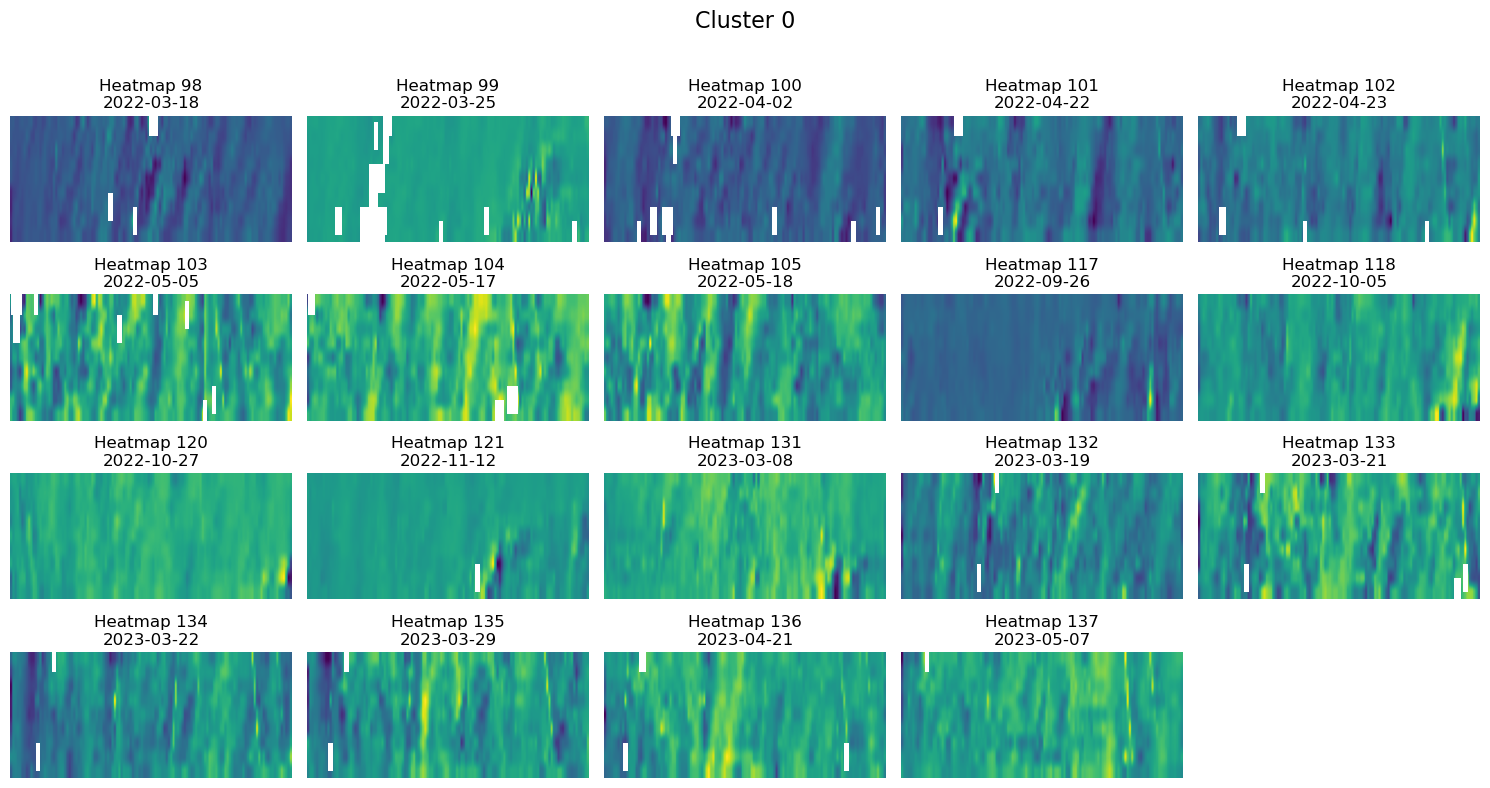

Cluster 1: 1 heatmaps


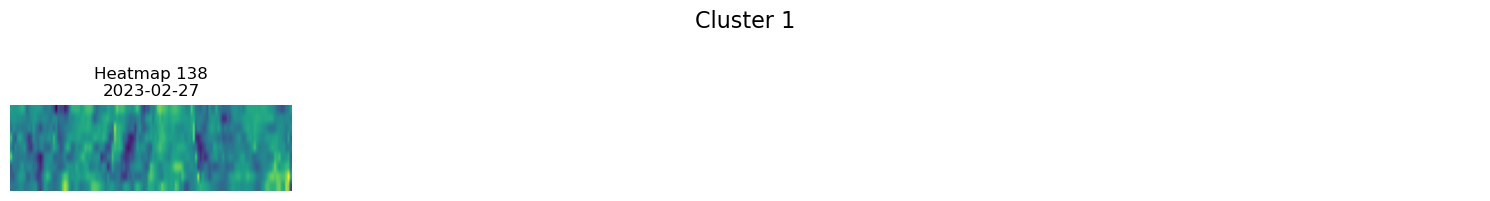

Cluster 2: 6 heatmaps


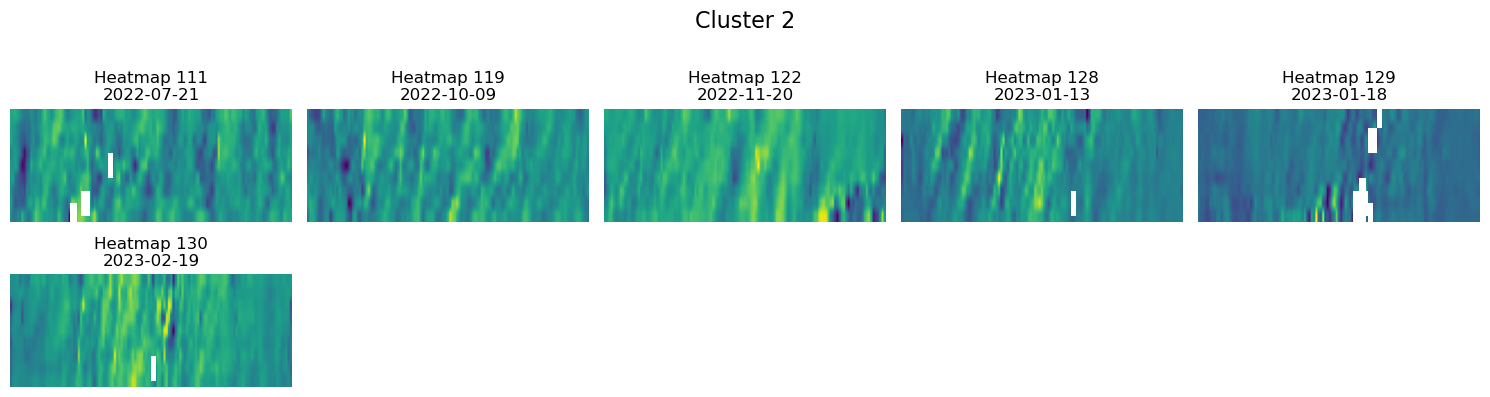

Cluster 3: 1 heatmaps


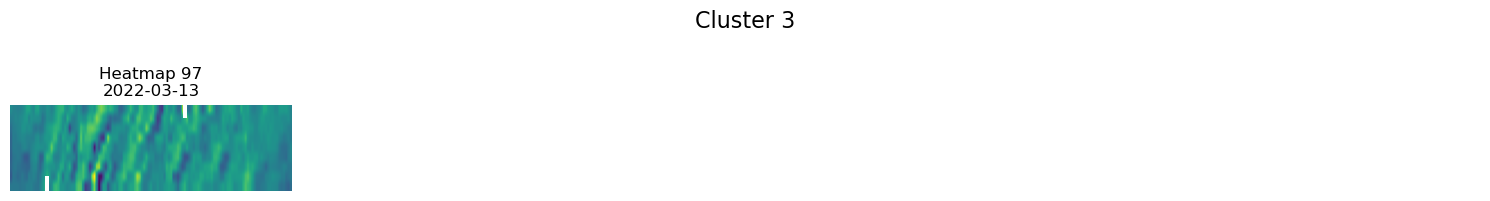

Cluster 4: 1 heatmaps


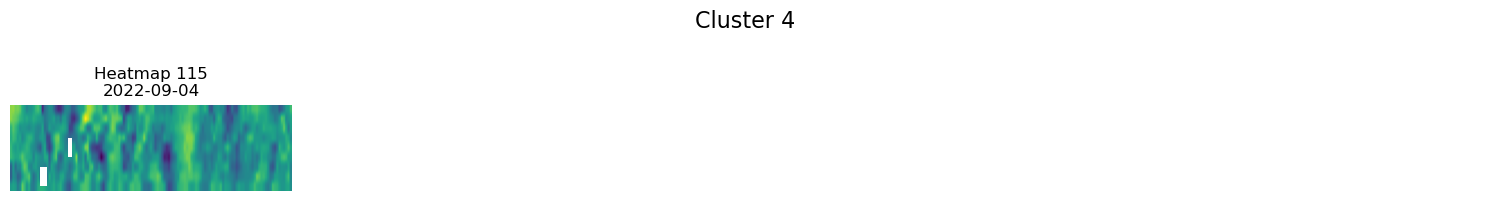

Cluster 5: 111 heatmaps


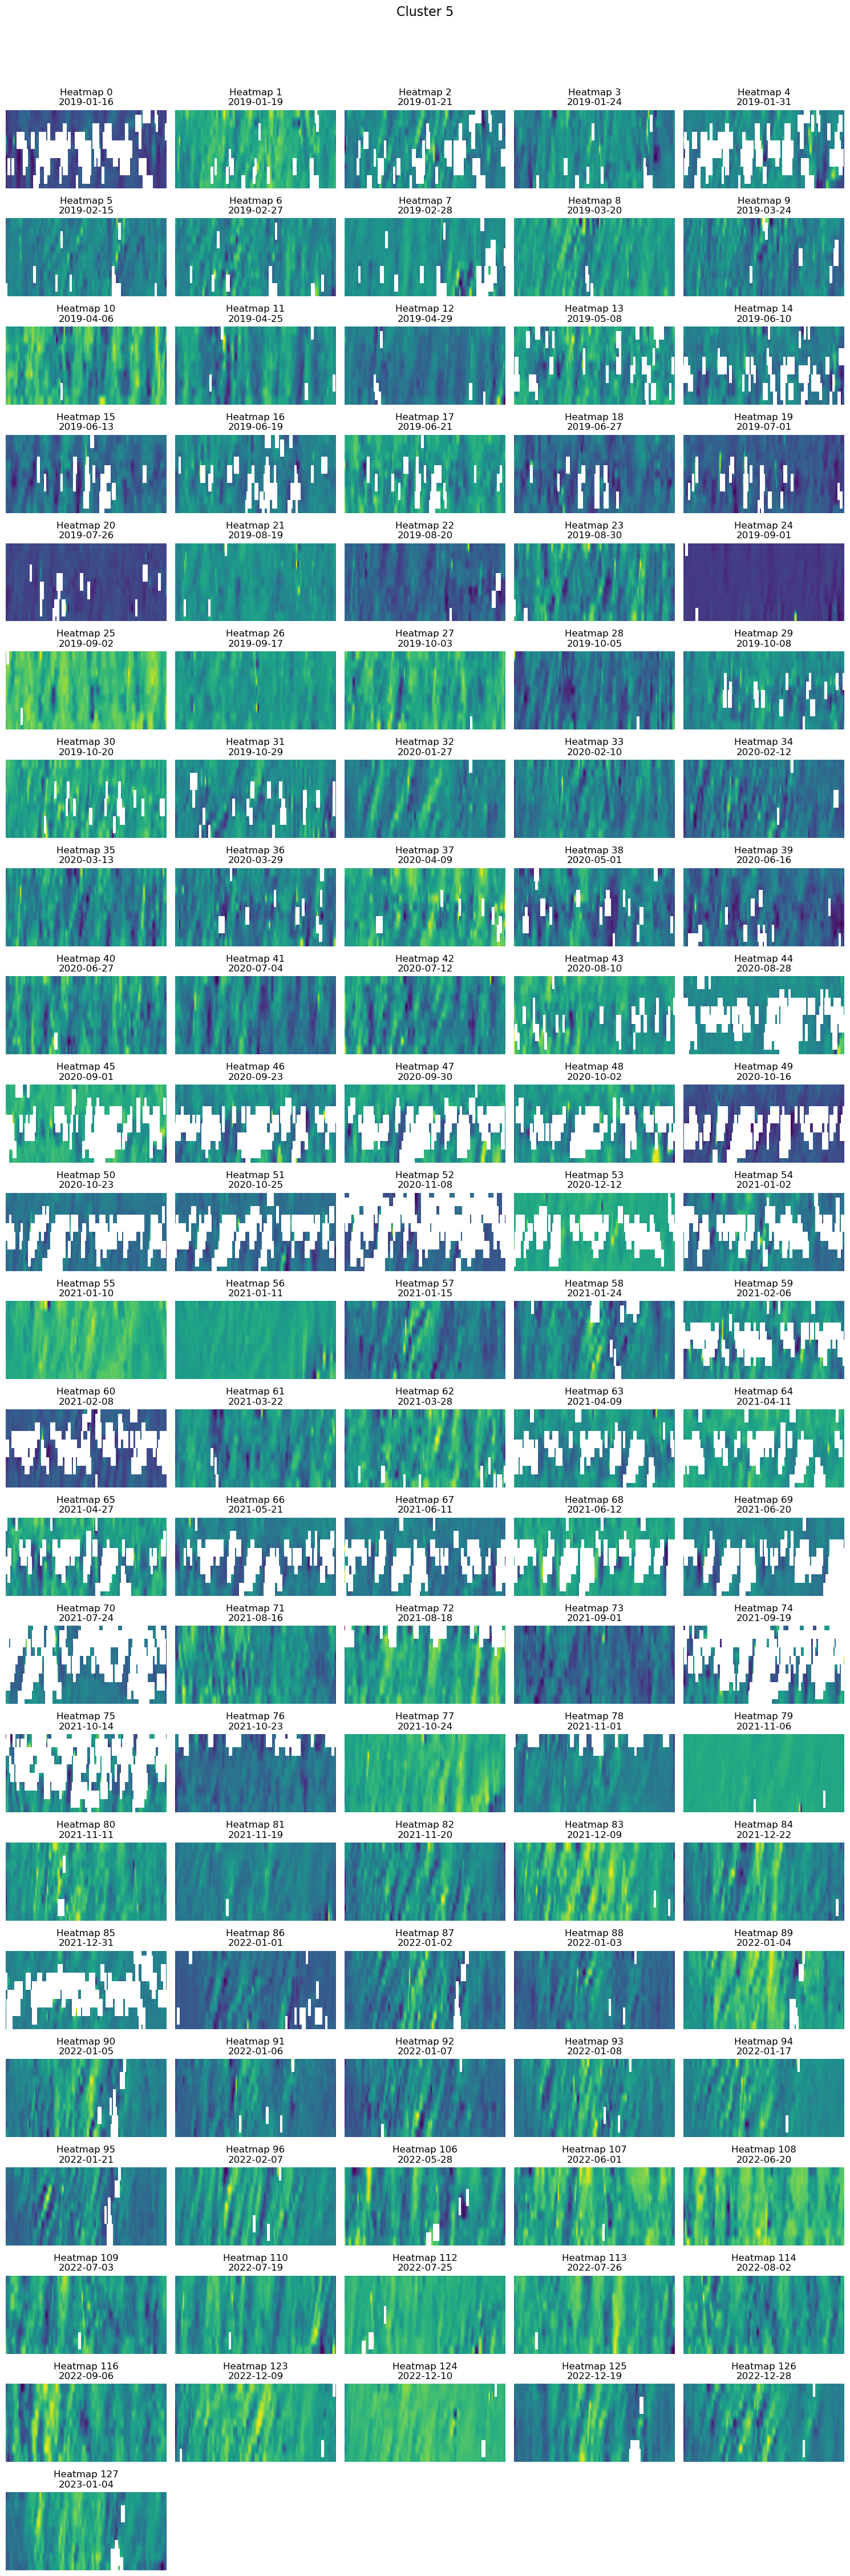

In [ ]:
if PRINT:
    for i in range(num_clus):
        cluster_indices = np.where(labels == i)[0]
        n_images = len(cluster_indices)
        print(f"Cluster {i}: {n_images} heatmaps")

        # Setup subplot grid
        n_cols = 5
        n_rows = math.ceil(n_images / n_cols)
        fig, axes = plt.subplots(n_rows, n_cols, figsize=(3*n_cols, 2*n_rows))
        axes = axes.flatten()  # Flatten for easy indexing

        for j, idx in enumerate(cluster_indices):
            ax = axes[j]
            ax.imshow(heatmaps[idx], aspect='auto', cmap='viridis')
            ax.set_title(f"Heatmap {idx}\n{dates[idx]}")
            ax.axis('off')  # Hide axes for cleaner layout

        # Hide unused subplots
        for k in range(j+1, len(axes)):
            axes[k].axis('off')

        fig.suptitle(f'Cluster {i}', fontsize=16)
        fig.tight_layout(rect=[0, 0, 1, 0.96])  # Leave space for title
        plt.show()

In [ ]:
if SAVE:
    data = {'dates': dates, 'labels':labels}
    datadf = pd.DataFrame(data, columns=['dates', 'labels'])
    datadf.to_csv(f'data/klusterit/klusteri{k}.csv')
    pd.DataFrame(dates, columns=['date']).to_csv('data/dates.csv', index=False)

if PRINT:
    print(dates)
    print(labels)

In [8]:
ks = [2,3,4,5,6,7,8,9,10,15,25,30]
clusters = {'dates':dates}
for k in ks:
    kmeans = KMeans(n_clusters=k) 
    labels = kmeans.fit_predict(heatmaps_imputed)
    clusters['k'+str(k)] = list(labels)

if SAVE:
    pd.DataFrame(clusters).to_csv('data/clusterdf.csv', index=False)


In [ ]:
nruns = 100
jakaumat = {}
SSAVE=True 

for k in ks:
    jakaumat[f'{k}'] = []
    for i in range(nruns):
        kmeans = KMeans(n_clusters=k) 
        labels = kmeans.fit_predict(heatmaps_imputed)
        jak = sorted([len(np.where(labels == j)[0]) for j in range(k)], reverse=True)
        jakaumat[f'{k}'].append(jak)
        if SSAVE:

In [10]:
ykkosluvut = {}
muut = {}

for i in jakaumat:
    ykkosluvut[i] = []
    muut[i] = []
    for run in jakaumat[i]:
        indexit = np.where(np.array(run) == 1)[0]
        ykkosluvut[i].append(len(indexit))
        if len(indexit) > 0:
            muut[i].append(run[:indexit[0]])
        else:
            muut[i].append(run)


In [14]:
for i in ykkosluvut:
    print(i, np.average(ykkosluvut[i]), np.average(ykkosluvut[i])/int(i), sum(ykkosluvut[i]))

2 0.57 0.285 57
3 1.2 0.39999999999999997 120
4 1.93 0.4825 193
5 2.48 0.496 248
6 3.29 0.5483333333333333 329
7 3.98 0.5685714285714286 398
8 4.88 0.61 488
9 5.59 0.6211111111111111 559
10 6.54 0.654 654
15 10.6 0.7066666666666667 1060
25 19.54 0.7816 1954
30 24.17 0.8056666666666668 2417


In [28]:
maxit = {'1':[], '2':[], '3':[]}
ykone = {}

for key in muut:
    ykone[key] = []
    for vals in muut[key]:
        ykone[key].append(vals[0])
        for z in range(0,len(vals)):
            try:
                maxit[str(z+1)].append(vals[z])
            except:
                continue


In [29]:
np.average(maxit['1']), np.average(maxit['2']), np.average(maxit['3'])

(102.02833333333334, 22.870404411764707, 10.022727272727273)

In [30]:
np.std(maxit['1']), np.std(maxit['2']), np.std(maxit['3']) 

(20.396303518584492, 7.183053421359066, 6.7989278051727675)

In [34]:
for kykoset in ykone:
    print(kykoset, np.average(ykone[kykoset]))

2 127.43
3 119.28
4 116.05
5 109.98
6 107.65
7 103.26
8 104.03
9 98.95
10 98.08
15 90.03
25 78.06
30 71.54
